In [95]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import k_means, kmeans_plusplus, KMeans
from sklearn.decomposition import PCA
import math 
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

In [96]:
#Display multiple digits
def showDigits(digits, labels, indexes, size=28):
    #Make a grid that is the right size
    pics = len(indexes)
    cols = 6
    rows = math.ceil(pics/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(14,6))
    plt.axis("off")

    #loop through the list of indexes, grab images and labels, plot in the "next" spot. 
    for i in range(0, pics):
        n = indexes[i]
        some_digit = digits[n:n+1]
        some_digit_image = np.array(some_digit).reshape(size, size)
        ax = axes[i//cols, i%cols]
        ax.axis("off")
        ax.imshow(some_digit_image, cmap=mpl.cm.binary)
        ax.set_title('Ind: {} - Lbl: {}'.format(indexes[i], labels[n]))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

In [97]:
#Load Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mnist = mnist[0:15000]
X = mnist["data"]
print(X.shape)

(70000, 784)


In [98]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [99]:
pca = PCA(0.99, whiten=True)
data_pca = pca.fit_transform(X)
data_pca.shape

(70000, 544)

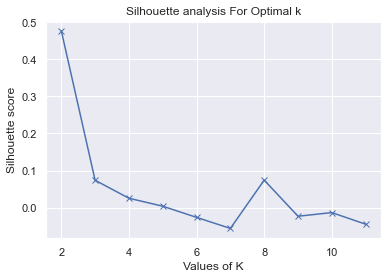

In [100]:
#Silhouette Scores
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10,11]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_pca)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(data_pca, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [107]:
kmeans=KMeans(n_clusters=11)

clusters=kmeans.fit_predict(data_pca)
centers=kmeans.cluster_centers_
centers.shape

(11, 544)

In [108]:
original=pca.inverse_transform(data_pca)
original_centers=pca.inverse_transform(centers)

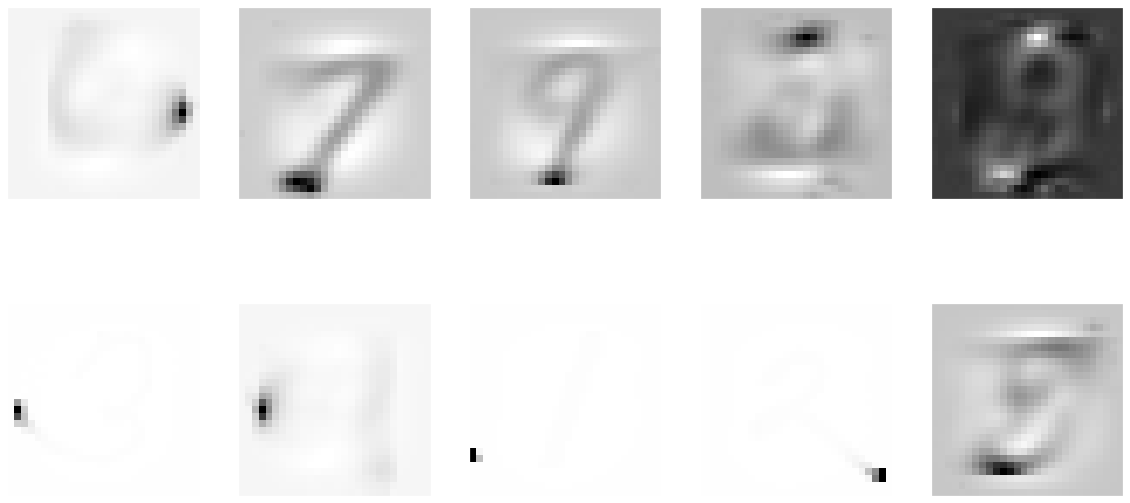

In [111]:
centers = original_centers.reshape(11,28,28)
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

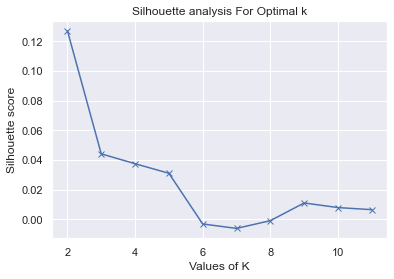

In [112]:
#Silhouette Scores
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10,11]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [134]:
kmeans2=KMeans(n_clusters=10)

labels2=kmeans2.fit_predict(X)
center2=kmeans2.cluster_centers_
center2.shape

(10, 784)

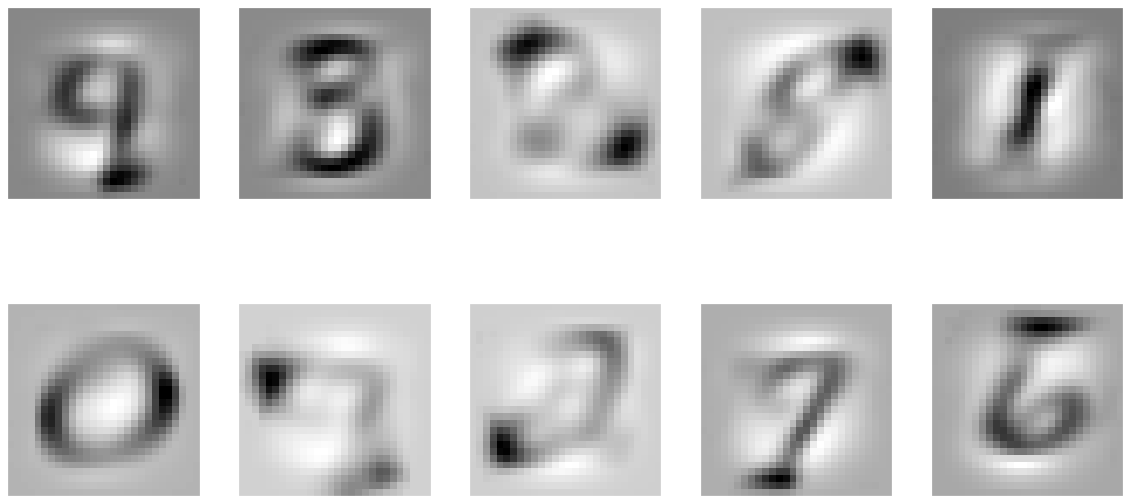

In [127]:
fig1, ax1=plt.subplots(2,5,figsize=(20,10))
center2=center2.reshape(10,28,28)

for axi2, center2 in zip(ax1.flat, center2):
    axi2.set(xticks=[], yticks=[])
    axi2.imshow(center2, interpolation='nearest', cmap=plt.cm.binary)

In [150]:
kmeans2=KMeans(n_clusters=10)

labels2=kmeans2.fit_predict(X)
center2=kmeans2.cluster_centers_
center2.shape

(10, 784)

In [151]:
# Assign labels to clusters based on the majority class


new_labels = np.zeros_like(labels2)
for i in range(10):
    mask = (labels2 == i)
    new_labels[mask] = np.argmax(np.bincount(mnist.target[mask].astype(int)))

# Add the new labels to the data
    new_data = np.c_[X, new_labels]

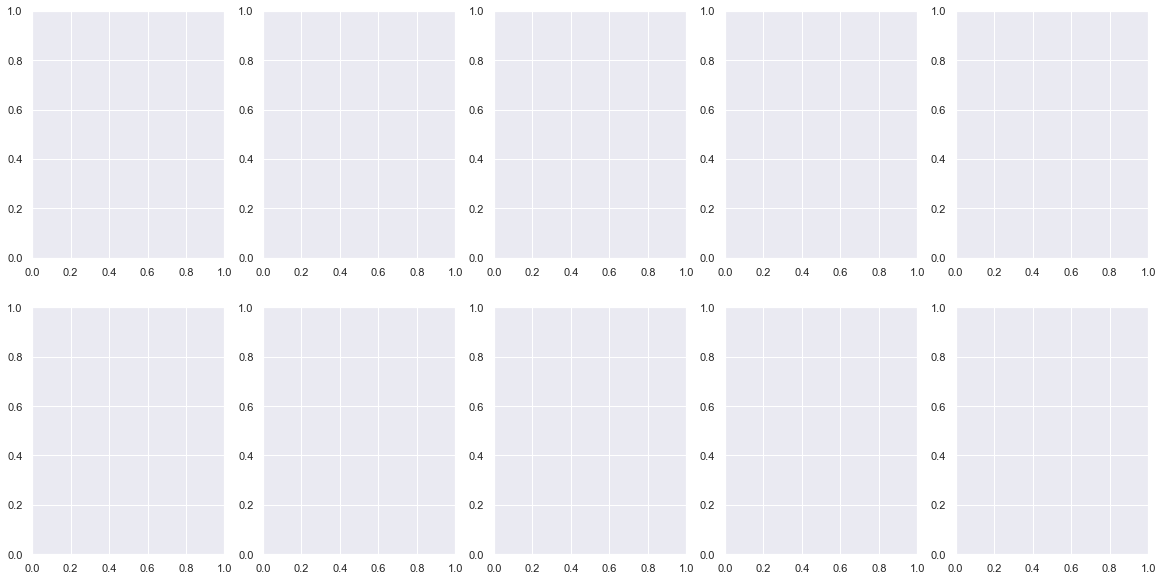

In [148]:
fig1, ax1=plt.subplots(2,5,figsize=(20,10))
center2=center2.reshape(10,28,28)

for axi2, center2 in zip(ax1.flat, center2):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center2, interpolation='nearest', cmap=plt.cm.binary)

In [152]:
for i in range(10):
    for j in range(10):
        mask = (new_labels == i * 10 + j)
        center = np.mean(X[mask], axis=0).reshape(28, 28)
        ax[i, j].set(xticks=[], yticks=[])
        ax[i, j].imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

IndexError: index 5 is out of bounds for axis 1 with size 5